# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

<img src='notebook_ims/autoencoder_1.png' />

### Compressed Representation

A compressed representation can be great for saving and sharing any kind of data in a way that is more efficient than storing raw data. In practice, the compressed representation often holds key information about an input image and we can use it for denoising images or oher kinds of reconstruction and transformation!

<img src='notebook_ims/denoising.png' width=60%/>

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

### Data

In [2]:
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor()])

# Download the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download = True, train = True, transform = transform)

# Download the test data 
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download = True, train = False, transform = transform)

# trainloader
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 20)

# testloader
testloader = torch.utils.data.DataLoader(testset, batch_size = 20)

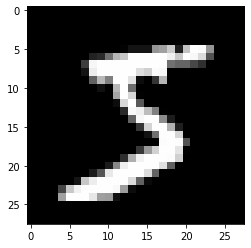

In [3]:
images, labels = next(iter(trainloader))
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')
plt.show()

## Linear Autoencoder

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building a simple autoencoder. The encoder and decoder should be made of **one linear layer**. The units that connect the encoder and decoder will be the _compressed representation_.

Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values that match this input value range.

<img src='notebook_ims/simple_autoencoder.png' width=50% />

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        
        self.fc1 = nn.Linear(28*28, encoding_dim)
        self.fc2 = nn.Linear(encoding_dim, 28*28)
            
            
    def forward(self, x):

        x = F.relu(self.fc1(x))
        # output layer (sigmoid for scaling from 0 to 1)
        x = F.sigmoid(self.fc2(x))
        
        return x  

In [7]:
encoding_dim = 32
model = Autoencoder(encoding_dim)
print(model)

Autoencoder(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=784, bias=True)
)


## Training 

In [8]:
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [9]:
epochs = 20

for epoch in range(epochs):
    train_loss = 0
    for images, _ in trainloader:
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad() 
        output = model(images)
        loss = criterion(output, images)
        loss.backward() 
        optimizer.step() 
        train_loss += loss.item()
        
    print('Epoch: {} Train loss: {}' .format(epoch + 1, train_loss/len(trainloader)))

C:\Users\Hanna\Anaconda3\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 1 Train loss: 0.034648295695583024
Epoch: 2 Train loss: 0.01938542546952764
Epoch: 3 Train loss: 0.017627801683420936
Epoch: 4 Train loss: 0.01718664004529516
Epoch: 5 Train loss: 0.016977116166924437
Epoch: 6 Train loss: 0.016842331245231133
Epoch: 7 Train loss: 0.016741102832369507
Epoch: 8 Train loss: 0.01665947800440093
Epoch: 9 Train loss: 0.016597398476675154
Epoch: 10 Train loss: 0.016545315026926497
Epoch: 11 Train loss: 0.016499972101921837
Epoch: 12 Train loss: 0.01645949529701223
Epoch: 13 Train loss: 0.01642313692656656
Epoch: 14 Train loss: 0.0163904754013444
Epoch: 15 Train loss: 0.01636079277843237
Epoch: 16 Train loss: 0.016333565619774164
Epoch: 17 Train loss: 0.01630850144320478
Epoch: 18 Train loss: 0.01628606344386935
Epoch: 19 Train loss: 0.016265159571853777
Epoch: 20 Train loss: 0.016243881117552518


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

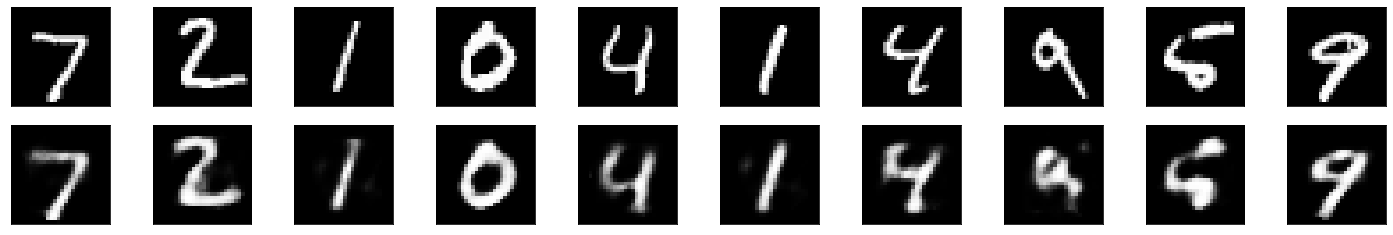

In [21]:
images, labels = next(iter(testloader))

images_flatten = images.view(images.shape[0], -1)
output = model(images_flatten)
output = output.view(images.shape[0], 1, 28, 28)

# numpy for plot
images = images.numpy()
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
